In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e = qt.basis(2,1)
g = qt.basis(2,0)

In [3]:
qubit = (1/np.sqrt(3) * e + np.sqrt(2)/np.sqrt(3) * g)

In [4]:
E0 = 0
E1 = 2

In [5]:
sigmap = qt.create(2)
sigmam = qt.destroy(2)

In [6]:
hamiltonian = (E1-E0) * sigmap * sigmam

In [7]:
tlist = np.linspace(0,6,200)

In [8]:
e_ops = [qt.sigmax(), qt.sigmay(), qt.sigmaz()]
c_ops = []

solution = qt.mesolve(hamiltonian, qubit, tlist, c_ops, e_ops)

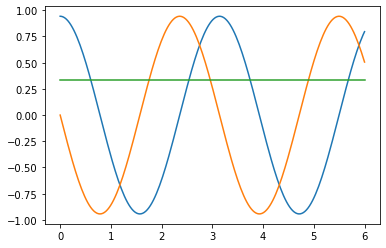

In [9]:
fig, ax = plt.subplots()
ax.plot(tlist,solution.expect[0])
ax.plot(tlist,solution.expect[1])
ax.plot(tlist,solution.expect[2])

In [10]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pylab as plab

fig = plab.figure()
ax = Axes3D(fig,azim=-40,elev=30)
sphere = qt.Bloch(axes=ax)
b = qt.Bloch()
pt = [solution.expect[0],solution.expect[1],solution.expect[2]]
b.add_points(pt)

def animate(i):
  sx, sy, sz = pt
  sphere.clear()
  sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]], meth='l')
  sphere.make_sphere()

  return ax

def init():

    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(pt[0])), init_func=init, blit=False, repeat=False)

ani.save('free_evolution.gif', fps=20)

C:\Users\user\AppData\Local\Temp\ipykernel_19020\1394458688.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,azim=-40,elev=30)


Error in callback <function flush_figures at 0x00000221DA7E65F0> (for post_execute):


KeyboardInterrupt: 

In [11]:
epsilon = 1
drive_frequency = (E1-E0) / (2 * np.pi)

In [12]:
def epsilon(t):
    return 10;

In [13]:
def drive_hamiltonian_coeff(t, args):
    return epsilon(t) * np.cos(drive_frequency * t)

In [14]:
tlist = np.linspace(0,3,200)

In [15]:
drive_hamiltonian = [sigmap + sigmam, drive_hamiltonian_coeff]

In [16]:
total_hamiltonian = [hamiltonian, drive_hamiltonian]

In [17]:
result = qt.mesolve(total_hamiltonian, g, tlist, [], e_ops)

In [18]:
result

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 3, num_collapse = 0

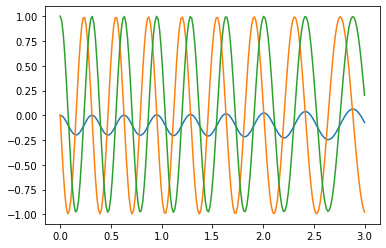

In [19]:
fig, ax = plt.subplots()
ax.plot(tlist,result.expect[0])
ax.plot(tlist,result.expect[1])
ax.plot(tlist,result.expect[2])

C:\Users\user\AppData\Local\Temp\ipykernel_19020\633851507.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,azim=-40,elev=30)


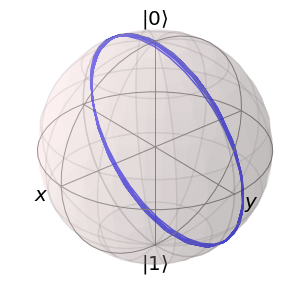

In [20]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pylab as plab

fig = plab.figure()
ax = Axes3D(fig,azim=-40,elev=30)
sphere = qt.Bloch(axes=ax)
b = qt.Bloch()
pt = [result.expect[0],result.expect[1],result.expect[2]]
b.add_points(pt)

def animate(i):
  sx, sy, sz = pt
  sphere.clear()
  sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]], meth='l')
  sphere.make_sphere()

  return ax

def init():

    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(pt[0])), init_func=init, blit=False, repeat=False)

ani.save('on_resonance2.gif', fps=20)

In [ ]:
writergif = animation.PillowWriter(fps=30)
ani.save('filename.gif',writer=writergif)